# Import libs

In [1]:
# Common libs
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

print('Import succesfully')

Import succesfully


# Prepare dataset

Download mnist dataset. The dataset contains 60,000 images for the training and 10,000 images for the testing. Then normalize the images from range [0, 255] to [0, 1] and resize to 28 x 28 x 1.

In [2]:
num_classes = 10
img_rows, img_cols, img_channels = 28, 28, 1
input_shape = (img_rows, img_cols, img_channels)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

In [4]:
def lenet5(name='lenet'):
  model = Sequential(name=name)
  # 1st block
  model.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # 2nd block
  model.add(Conv2D(16, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # FC
  model.add(Flatten())
  model.add(Dense(120, activation='relu'))
  model.add(Dense(84, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [5]:
# Setting som variables to format the logs:
log_begin_red, log_begin_blue, log_begin_green = '\033[91m', '\n\033[94m', '\033[92m'
log_begin_bold, log_begin_underline = '\033[1m', '\033[4m'
log_end_format = '\033[0m'

# Training with various optimizers

For each optimizer, we instantiate lenet5 model and train with it. We will save the their training `history` for comparison.

In [6]:
optimizers_dict = {
    'sgd': SGD(),
    'momentum': SGD(momentum=.9),
    'nag': SGD(momentum=.9, nesterov=True),
    'adagrad': Adagrad(),
    'adadelta': Adadelta(),
    'rmsprop': RMSprop(),
    'adam': Adam()
}

In [15]:
optimizer_history = dict()

print('Experiment {0}start{1} (training logs = off)'.format(log_begin_red, log_end_format))
for optimizer_name in optimizers_dict:
  # Resetting the seed (for random number generation), to reduce the impact of randomness on the comparison:
  np.random.seed(42)
  tf.random.set_seed(42)
  # Creating the model
  model = lenet5('lenet_{}'.format(optimizer_name))
  optimizer = optimizers_dict[optimizer_name]
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  print('\t> Training with: {}: {}start{}'.format(
      optimizer_name, log_begin_red, log_end_format
  ))
  # Launching the training (we set `verbose = 0`, so the training wont generate any logs).
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                      batch_size=64, epochs=20, verbose=0)
  optimizer_history[optimizer_name] = history
  print('\t> Training with {0}: {1}done{2}'.format(
      optimizer_name, log_begin_green, log_end_format
  ))
print('Experiment: {0}done{1}'.format(log_begin_green, log_end_format))

Experiment start (training logs = off)
	> Training with: sgd: start
	> Training with sgd: done
	> Training with: momentum: start
	> Training with momentum: done
	> Training with: nag: start
	> Training with nag: done
	> Training with: adagrad: start
	> Training with adagrad: done
	> Training with: adadelta: start
	> Training with adadelta: done
	> Training with: rmsprop: start
	> Training with rmsprop: done
	> Training with: adam: start
	> Training with adam: done
Experiment: done


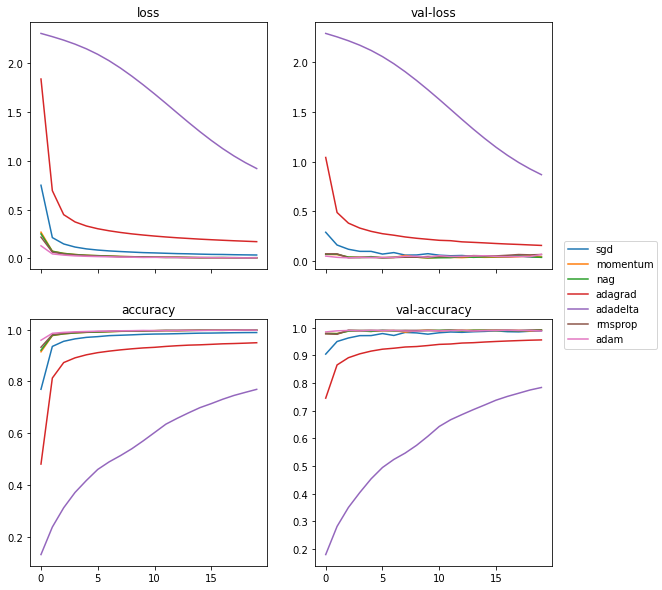

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex='col')
axs[0, 0].set_title('loss')
axs[0, 1].set_title('val-loss')
axs[1, 0].set_title('accuracy')
axs[1, 1].set_title('val-accuracy')

lines, labels = [], []
for optimizer_name in optimizer_history:
  history = optimizer_history[optimizer_name]
  # Plotting history
  axs[0, 0].plot(history.history['loss'])
  axs[0, 1].plot(history.history['val_loss'])
  axs[1, 0].plot(history.history['accuracy'])
  line = axs[1, 1].plot(history.history['val_accuracy'])
  # Appending the line of the optimzer history to legend latter.
  lines.append(line[0])
  # Appending to name of the optimzer to legend latter.
  labels.append(optimizer_name)

fig.legend(lines, labels, loc='center right')
# Resize the axes
plt.subplots_adjust(right=.85)